<a href="https://colab.research.google.com/github/yavuzkuk/Mnist-Dataset/blob/main/Mnist_Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential
from keras.datasets import mnist

In [3]:
(train_img,train_label),(test_img,test_label) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
train_img = train_img/255.0
test_img = test_img/255.0

In [5]:
train_img = train_img.reshape(train_img.shape[0],28,28)
test_img = test_img.reshape(test_img.shape[0],28,28)

In [6]:
from keras.utils.np_utils import to_categorical
model = Sequential()

model.add(Conv2D(filters=6,kernel_size=(5,5),padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(120,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(metrics=["accuracy"],optimizer="adam",loss="categorical_crossentropy")

train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [7]:
history = model.fit(train_img,train_label,epochs=20,validation_data=(test_img,test_label))

Epoch 1/20
1875/1875 [==============================] - 65s 32ms/step - loss: 0.2021 - accuracy: 0.9396 - val_loss: 0.0639 - val_accuracy: 0.9785
Epoch 2/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0645 - accuracy: 0.9800 - val_loss: 0.0548 - val_accuracy: 0.9818
Epoch 3/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0442 - accuracy: 0.9857 - val_loss: 0.0453 - val_accuracy: 0.9851
Epoch 4/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0394 - val_accuracy: 0.9881
Epoch 5/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.0341 - val_accuracy: 0.9888
Epoch 6/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0304 - val_accuracy: 0.9910
Epoch 7/20
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0324 -

In [8]:
loss,accuracy = model.evaluate(test_img,test_label)

313/313 [==============================] - 2s 7ms/step - loss: 0.0531 - accuracy: 0.9899


In [9]:
import matplotlib.pyplot as plt

In [10]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]

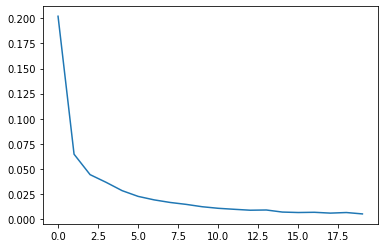

In [11]:
plt.plot(range(len(loss)),loss)
plt.show()

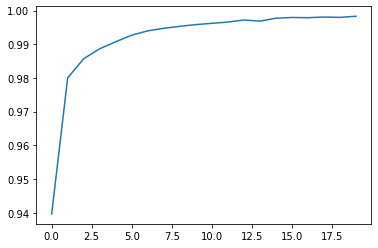

In [12]:
plt.plot(range(len(accuracy)),accuracy)
plt.show()